<a href="https://colab.research.google.com/github/rebeccalipton/nasa-jam-session/blob/main/jam_sessions_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving Methane_CA_Permian_Plume_list.csv to Methane_CA_Permian_Plume_list (1).csv
Saving reactive-gases.csv to reactive-gases (1).csv
Saving so2-values.csv to so2-values (1).csv


In [ ]:
import io
methane = pd.read_csv(io.BytesIO(uploaded['Methane_CA_Permian_Plume_list.csv']), sep = ",")
methane = pd.DataFrame(methane)

reactive = pd.read_csv(io.BytesIO(uploaded['reactive-gases.csv']), sep = ",")
reactive = pd.DataFrame(reactive)

so2 = pd.read_csv(io.BytesIO(uploaded['so2-values.csv']), sep = ",")
so2 = pd.DataFrame(so2)

In [ ]:
methane.describe()

,Plume latitude (deg),Plume longitude (deg),Qplume (kg/hr): Plume emissions,Sigma Qplume (kg/hr): Uncertainty for plume emissions
count,4248.000000,4248.000000,4117.000000,4117.000000
mean,32.965024,-107.867352,509.860821,166.868351
std,1.778769,7.259477,740.533180,246.936068
min,30.962792,-122.565631,9.000000,2.000000
25%,31.842068,-118.369336,159.000000,51.000000
50%,32.154758,-103.913202,296.000000,101.000000
75%,33.978291,-103.481263,587.000000,196.000000
max,39.560573,-101.295103,16811.000000,8519.000000


In [ ]:
reactive.describe() 

,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,94.601021,104.662160,116.238597,126.039668,137.221790,143.247049,150.113465,158.205721,161.581806,163.826647
std,116.148840,127.923956,147.142208,166.671764,193.431872,208.096014,227.576119,252.038496,262.093032,270.888822
min,2.623400,2.623400,2.623400,2.489800,2.173700,1.835600,1.556400,1.393000,1.312300,1.237200
25%,13.737225,16.433025,20.380100,22.648575,25.067525,25.150100,22.019500,20.668575,22.098250,21.332875
50%,47.668950,56.574650,59.302850,60.264700,56.168250,61.401200,64.191400,66.311750,58.899900,58.206950
75%,113.927700,133.304775,138.876650,142.961875,151.957125,156.914250,154.524150,144.950875,143.695575,157.883500
max,447.590300,498.569200,639.314400,777.350600,1029.593400,1067.448400,1132.605500,1225.601300,1241.901000,1187.428300


In [ ]:
so2.describe()

,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,19.414286,18.871429,20.442857,22.123810,22.842857,20.859524,18.907143,15.178571,12.350000,10.866667,10.264286,9.669048
std,20.979114,19.902301,21.916450,24.861125,25.954972,24.256164,22.543934,18.017492,14.656427,13.036135,12.495518,12.048246
min,4.600000,5.400000,5.300000,2.100000,0.600000,0.600000,0.000000,0.400000,0.800000,0.700000,1.500000,1.100000
25%,5.900000,7.400000,8.300000,7.750000,6.825000,6.325000,5.025000,4.825000,3.550000,3.225000,3.000000,2.700000
50%,11.800000,11.000000,11.300000,12.350000,13.150000,11.250000,10.200000,7.750000,5.950000,5.250000,5.050000,4.450000
75%,22.700000,17.000000,18.850000,22.000000,23.700000,23.500000,20.800000,16.400000,13.950000,13.400000,12.225000,11.450000
max,67.900000,66.000000,84.100000,97.200000,109.500000,106.000000,102.400000,86.600000,70.700000,61.700000,59.500000,57.300000


In [ ]:
len(methane)

4248

In [ ]:
len(reactive)

120

In [ ]:
len(so2)

53

In [ ]:
so2.head()

,Unnamed: 0,Unnamed: 1,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,NaN,A1-AIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OECD90,NaN,22.7,17.0,9.9,6.9,6.4,6.3,6.3,6.0,5.7,5.3,5.0,4.6
2,FSU/EE,NaN,17.0,11.0,12.2,10.8,7.5,4.3,2.4,2.0,1.7,1.6,1.6,1.6
3,China/CPA,NaN,11.8,16.5,28.7,35.0,26.7,10.1,3.4,3.2,3.0,2.9,2.8,2.7
4,S&E Asia,NaN,5.9,8.8,13.4,19.2,18.9,9.7,5.0,4.7,4.5,4.2,3.9,3.7


In [ ]:
reactive.head()

,Scenario,Gas/Region,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,A1AIM,CH4,MtCH4,MtCH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,OECD90,72.9801,73.5399,71.1634,68.9441,65.7877,58.2814,51.5337,49.4557,47.4496,45.6305,43.9843,42.3882
2,NaN,REF,47.0804,38.8544,57.8602,61.2764,59.8608,50.5076,42.3576,40.8520,39.3875,37.7340,35.9120,34.1556
3,NaN,ASIA,112.8938,125.3791,144.7888,170.7022,206.5665,210.3425,214.1863,182.9251,156.1512,138.4179,127.4492,117.3276
4,NaN,ALM,76.7245,85.1631,99.2297,119.8457,134.0362,139.0303,144.2315,136.9771,130.1256,119.6887,106.7063,95.3133


In [ ]:
methane.head()

,Source identifier,Plume latitude (deg),Plume longitude (deg),Candidate identifier,Date of detection,Time of detection (UTC),Source type (best estimate),Sectors (IPCC),Qplume (kg/hr): Plume emissions,Sigma Qplume (kg/hr): Uncertainty for plume emissions
0,S00006,34.44705,-118.588342,ang20160910t185702-A,9/10/16,18:57,gas storage facility,1B2 Oil & Natural Gas,132.0,50.0
1,S00006,34.44705,-118.588342,ang20160910t191651-A,9/10/16,19:16,gas storage facility,1B2 Oil & Natural Gas,89.0,52.0
2,S00006,34.44705,-118.588342,ang20160910t192242-A,9/10/16,19:22,gas storage facility,1B2 Oil & Natural Gas,185.0,70.0
3,S00006,34.44705,-118.588342,ang20160912t195241-A,9/12/16,19:52,gas storage facility,1B2 Oil & Natural Gas,138.0,52.0
4,S00006,34.44705,-118.588342,ang20160912t225718-B,9/12/16,22:57,gas storage facility,1B2 Oil & Natural Gas,350.0,106.0


In [ ]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()
# !conda install geopandas

In [ ]:
import geopandas
import matplotlib.pyplot as plt

methaneGDF = geopandas.GeoDataFrame(methane, geometry = methane.geometry)
methaneGDF.head()

,Source identifier,Plume latitude (deg),Plume longitude (deg),Candidate identifier,Date of detection,Time of detection (UTC),Source type (best estimate),Sectors (IPCC),Qplume (kg/hr): Plume emissions,Sigma Qplume (kg/hr): Uncertainty for plume emissions,geometry
0,S00006,34.44705,-118.588342,ang20160910t185702-A,9/10/16,18:57,gas storage facility,1B2 Oil & Natural Gas,132.0,50.0,POINT (-118.58834 34.44705)
1,S00006,34.44705,-118.588342,ang20160910t191651-A,9/10/16,19:16,gas storage facility,1B2 Oil & Natural Gas,89.0,52.0,POINT (-118.58834 34.44705)
2,S00006,34.44705,-118.588342,ang20160910t192242-A,9/10/16,19:22,gas storage facility,1B2 Oil & Natural Gas,185.0,70.0,POINT (-118.58834 34.44705)
3,S00006,34.44705,-118.588342,ang20160912t195241-A,9/12/16,19:52,gas storage facility,1B2 Oil & Natural Gas,138.0,52.0,POINT (-118.58834 34.44705)
4,S00006,34.44705,-118.588342,ang20160912t225718-B,9/12/16,22:57,gas storage facility,1B2 Oil & Natural Gas,350.0,106.0,POINT (-118.58834 34.44705)


Locations of our latitude and longitude coordinates:

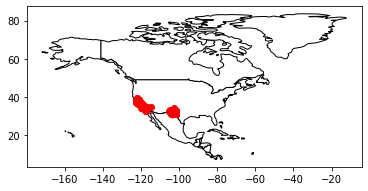

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == "North America"].plot(color = "white", edgecolor = "black")
methaneGDF.plot(ax = ax, color = "red")
methaneGDF.title()
plt.show()

In [ ]:
methane

,Source identifier,Plume latitude (deg),Plume longitude (deg),Candidate identifier,Date of detection,Time of detection (UTC),Source type (best estimate),Sectors (IPCC),Qplume (kg/hr): Plume emissions,Sigma Qplume (kg/hr): Uncertainty for plume emissions,geometry
0,S00006,34.447050,-118.588342,ang20160910t185702-A,9/10/16,18:57,gas storage facility,1B2 Oil & Natural Gas,132.0,50.0,POINT (-118.58834 34.44705)
1,S00006,34.447050,-118.588342,ang20160910t191651-A,9/10/16,19:16,gas storage facility,1B2 Oil & Natural Gas,89.0,52.0,POINT (-118.58834 34.44705)
2,S00006,34.447050,-118.588342,ang20160910t192242-A,9/10/16,19:22,gas storage facility,1B2 Oil & Natural Gas,185.0,70.0,POINT (-118.58834 34.44705)
3,S00006,34.447050,-118.588342,ang20160912t195241-A,9/12/16,19:52,gas storage facility,1B2 Oil & Natural Gas,138.0,52.0,POINT (-118.58834 34.44705)
4,S00006,34.447050,-118.588342,ang20160912t225718-B,9/12/16,22:57,gas storage facility,1B2 Oil & Natural Gas,350.0,106.0,POINT (-118.58834 34.44705)
...,...,...,...,...,...,...,...,...,...,...,...
4243,P01795,32.777299,-104.280210,GAO20191103t185130p0000-B,11/3/19,18:51:30,tank,1B2 Oil & Natural Gas,244.0,138.0,POINT (-104.28021 32.77730)
4244,P01796,32.888250,-104.119920,GAO20191103t190631p0000-A,11/3/19,19:06:31,NaN,1B2 Oil & Natural Gas,185.0,55.0,POINT (-104.11992 32.88825)
4245,P01797,32.884300,-104.123290,GAO20191103t190631p0000-B,11/3/19,19:06:31,NaN,1B2 Oil & Natural Gas,238.0,64.0,POINT (-104.12329 32.88430)
4246,P01795,32.777258,-104.279850,GAO20191103t190631p0000-C,11/3/19,19:06:31,tank,1B2 Oil & Natural Gas,282.0,118.0,POINT (-104.27985 32.77726)


In [ ]:
reactive

,Scenario,Gas/Region,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,A1AIM,CH4,MtCH4,MtCH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,OECD90,72.9801,73.5399,71.1634,68.9441,65.7877,58.2814,51.5337,49.4557,47.4496,45.6305,43.9843,42.3882
2,NaN,REF,47.0804,38.8544,57.8602,61.2764,59.8608,50.5076,42.3576,40.8520,39.3875,37.7340,35.9120,34.1556
3,NaN,ASIA,112.8938,125.3791,144.7888,170.7022,206.5665,210.3425,214.1863,182.9251,156.1512,138.4179,127.4492,117.3276
4,NaN,ALM,76.7245,85.1631,99.2297,119.8457,134.0362,139.0303,144.2315,136.9771,130.1256,119.6887,106.7063,95.3133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,B2MESSAGE,CO,MtCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,OECD90,179.434,161.4906,163.0953,172.5363,179.5934,187.2806,185.4972,185.4707,195.3364,213.4530,207.1460,197.3527
117,NaN,REF,68.9262,41.3075,42.6225,47.8728,58.6261,68.5673,74.1863,72.8837,68.3400,71.6402,70.2619,78.5869
118,NaN,ASIA,234.7763,269.8737,313.5417,375.3567,427.6709,471.6924,517.9392,548.6482,578.7874,597.5722,617.2228,650.8947


In [ ]:
so2

,Unnamed: 0,Unnamed: 1,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,NaN,A1-AIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OECD90,NaN,22.7,17.0,9.9,6.9,6.4,6.3,6.3,6.0,5.7,5.3,5.0,4.6
2,FSU/EE,NaN,17.0,11.0,12.2,10.8,7.5,4.3,2.4,2.0,1.7,1.6,1.6,1.6
3,China/CPA,NaN,11.8,16.5,28.7,35.0,26.7,10.1,3.4,3.2,3.0,2.9,2.8,2.7
4,S&E Asia,NaN,5.9,8.8,13.4,19.2,18.9,9.7,5.0,4.7,4.5,4.2,3.9,3.7
5,Latin Am,NaN,4.6,5.4,5.3,5.2,5.1,4.9,4.8,4.7,4.6,4.5,4.4,4.3
6,Afr/Mid E,NaN,6.0,7.4,14.7,20.2,23.4,30.6,39.3,23.3,13.2,9.2,8.5,7.8
7,NaN,NaN,67.9,66.0,84.1,97.2,88.0,65.9,61.1,43.9,32.7,27.7,26.1,24.6
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,A2-ASF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
so2

,Unnamed: 0,Unnamed: 1,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,NaN,A1-AIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OECD90,NaN,22.7,17.0,9.9,6.9,6.4,6.3,6.3,6.0,5.7,5.3,5.0,4.6
2,FSU/EE,NaN,17.0,11.0,12.2,10.8,7.5,4.3,2.4,2.0,1.7,1.6,1.6,1.6
3,China/CPA,NaN,11.8,16.5,28.7,35.0,26.7,10.1,3.4,3.2,3.0,2.9,2.8,2.7
4,S&E Asia,NaN,5.9,8.8,13.4,19.2,18.9,9.7,5.0,4.7,4.5,4.2,3.9,3.7
5,Latin Am,NaN,4.6,5.4,5.3,5.2,5.1,4.9,4.8,4.7,4.6,4.5,4.4,4.3
6,Afr/Mid E,NaN,6.0,7.4,14.7,20.2,23.4,30.6,39.3,23.3,13.2,9.2,8.5,7.8
7,NaN,NaN,67.9,66.0,84.1,97.2,88.0,65.9,61.1,43.9,32.7,27.7,26.1,24.6
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,A2-ASF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
